In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
tetrahedron_points = [np.array([0., 0., 0.]),
                      np.array([1., 0., 0.]),
                      np.array([np.cos(np.pi/3), np.sin(np.pi/3), 0.]),
                      np.array([0.5, 0.5/np.sqrt(3), np.sqrt(2./3.)])]

sampled_points = np.concatenate([np.random.multivariate_normal(point, np.eye(3)*0.0001, 10)
                                 for point in tetrahedron_points])

init_points = np.concatenate([np.random.multivariate_normal(point[:2], np.eye(2)*0.0001, 10)
                              for point in tetrahedron_points])

In [3]:
N = sampled_points.shape[0]
d = sampled_points.shape[1]

In [4]:
X = tf.placeholder('float')
Xshape = tf.shape(X)

sqX = tf.reduce_sum(X*X, 1)
sqX = tf.reshape(sqX, [-1, 1])
sqDX = sqX - 2*tf.matmul(X, tf.transpose(X)) + tf.transpose(sqX)
DX = tf.sqrt(sqDX)

Y = tf.Variable(init_points, dtype='float')
sqY = tf.reduce_sum(Y*Y, 1)
sqY = tf.reshape(sqY, [-1, 1])
sqDY = sqY - 2*tf.matmul(Y, tf.transpose(Y)) + tf.transpose(sqY)
DY = tf.sqrt(sqDY)

In [5]:
Z = tf.reduce_sum(DX)*0.5
cost = tf.reduce_sum(tf.divide(tf.square(DX-DY), DX))*0.5

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

In [7]:
sess = tf.Session()

In [8]:
sess.run(init)

In [9]:
sess.run(DX, feed_dict={X: sampled_points})

array([[ 0.        ,  0.01725471,  0.03230405, ...,  0.98257208,
         1.00708711,  0.98473948],
       [ 0.01725471,  0.        ,  0.02151917, ...,  0.98990685,
         1.01440847,  0.99179047],
       [ 0.03230405,  0.02151917,  0.        , ...,  0.9908241 ,
         1.01538837,  0.99260306],
       ..., 
       [ 0.98257208,  0.98990685,  0.9908241 , ...,  0.        ,
         0.02483763,  0.01817823],
       [ 1.00708711,  1.01440847,  1.01538837, ...,  0.02483883,
         0.        ,  0.02835082],
       [ 0.98473948,  0.99179047,  0.99260306, ...,  0.01817823,
         0.02835187,  0.        ]], dtype=float32)

In [10]:
sess.run(DY, feed_dict={X: sampled_points})

array([[ 0.        ,  0.00897681,  0.01639934, ...,  0.5865441 ,
         0.57201755,  0.56491607],
       [ 0.00897681,  0.        ,  0.01704324, ...,  0.59475619,
         0.58035648,  0.57311779],
       [ 0.01639934,  0.01704324,  0.        , ...,  0.59623224,
         0.58122152,  0.57464874],
       ..., 
       [ 0.5865441 ,  0.59475619,  0.59623224, ...,  0.        ,
         0.02574497,  0.02169557],
       [ 0.57201755,  0.58035648,  0.58122152, ...,  0.02574497,
         0.        ,  0.02364512],
       [ 0.56491607,  0.57311779,  0.57464874, ...,  0.02169557,
         0.02364512,  0.        ]], dtype=float32)

In [11]:
calculated_Y = sess.run(Y, feed_dict={X: sampled_points})

In [12]:
sess.close()

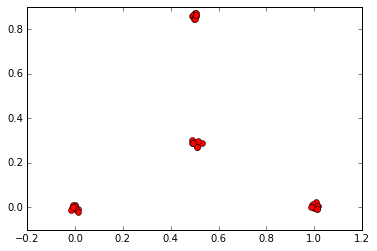

In [13]:
embed1, embed2 = calculated_Y.transpose()
plt.plot(embed1, embed2, 'ro')